In [26]:
#import data yang digunakan
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
df_loc = pd.read_csv("countries_codes_and_coordinates.csv")

#menggabungkan csv -> lat & lang untuk masing" location
result = pd.merge(df, df_loc, how="left", on=["iso_code","iso_code"])
result.to_csv("result.csv")

In [78]:
#tabel yang digunakan untuk negara prancis
pd.set_option('display.max_columns', None)
newdf = result[(result.location == "France")]

newdf=newdf.fillna(value=0)

newdf

iso_code continent location        date  total_cases  new_cases  \
82150      FRA    Europe   France  2020-01-24          2.0        2.0   
82151      FRA    Europe   France  2020-01-25          3.0        1.0   
82152      FRA    Europe   France  2020-01-26          3.0        0.0   
82153      FRA    Europe   France  2020-01-27          3.0        0.0   
82154      FRA    Europe   France  2020-01-28          4.0        1.0   
...        ...       ...      ...         ...          ...        ...   
83243      FRA    Europe   France  2023-01-21   39516793.0        0.0   
83244      FRA    Europe   France  2023-01-22   39516793.0        0.0   
83245      FRA    Europe   France  2023-01-23   39525621.0     8828.0   
83246      FRA    Europe   France  2023-01-24   39532897.0     7276.0   
83247      FRA    Europe   France  2023-01-25   39538244.0     5347.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
82150               0.000           0.0         0.0                0.000   
82151               0.000           0.0         0.0                0.000   
82152               0.000           0.0         0.0                0.000   
82153               0.000           0.0         0.0                0.000   
82154               0.000           0.0         0.0                0.000   
...                   ...           ...         ...                  ...   
83243            4938.857      163821.0         0.0               57.857   
83244            4938.857      163821.0         0.0               57.857   
83245            4652.857      164018.0       197.0               69.429   
83246            4495.000      164077.0        59.0               63.714   
83247            4416.857      164055.0         0.0                0.000   

       total_cases_per_million  new_cases_per_million  \
82150                    0.029                  0.029   
82151                    0.044                  0.015   
82152                    0.044                  0.000   
82153                    0.044                  0.000   
82154                    0.059                  0.015   
...                        ...                    ...   
83243               582731.821                  0.000   
83244               582731.821                  0.000   
83245               582862.003                130.182   
83246               582969.298                107.295   
83247               583048.147                 78.849   

       new_cases_smoothed_per_million  total_deaths_per_million  \
82150                           0.000                     0.000   
82151                           0.000                     0.000   
82152                           0.000                     0.000   
82153                           0.000                     0.000   
82154                           0.000                     0.000   
...                               ...                       ...   
83243                          72.831                  2415.776   
83244                          72.831                  2415.776   
83245                          68.613                  2418.681   
83246                          66.285                  2419.551   
83247                          65.133                  2419.226   

       new_deaths_per_million  new_deaths_smoothed_per_million  \
82150                   0.000                            0.000   
82151                   0.000                            0.000   
82152                   0.000                            0.000   
82153                   0.000                            0.000   
82154                   0.000                            0.000   
...                       ...                              ...   
83243                   0.000                            0.853   
83244                   0.000                            0.853   
83245                   2.905                            1.024   
83246                   0.870                            0.940   


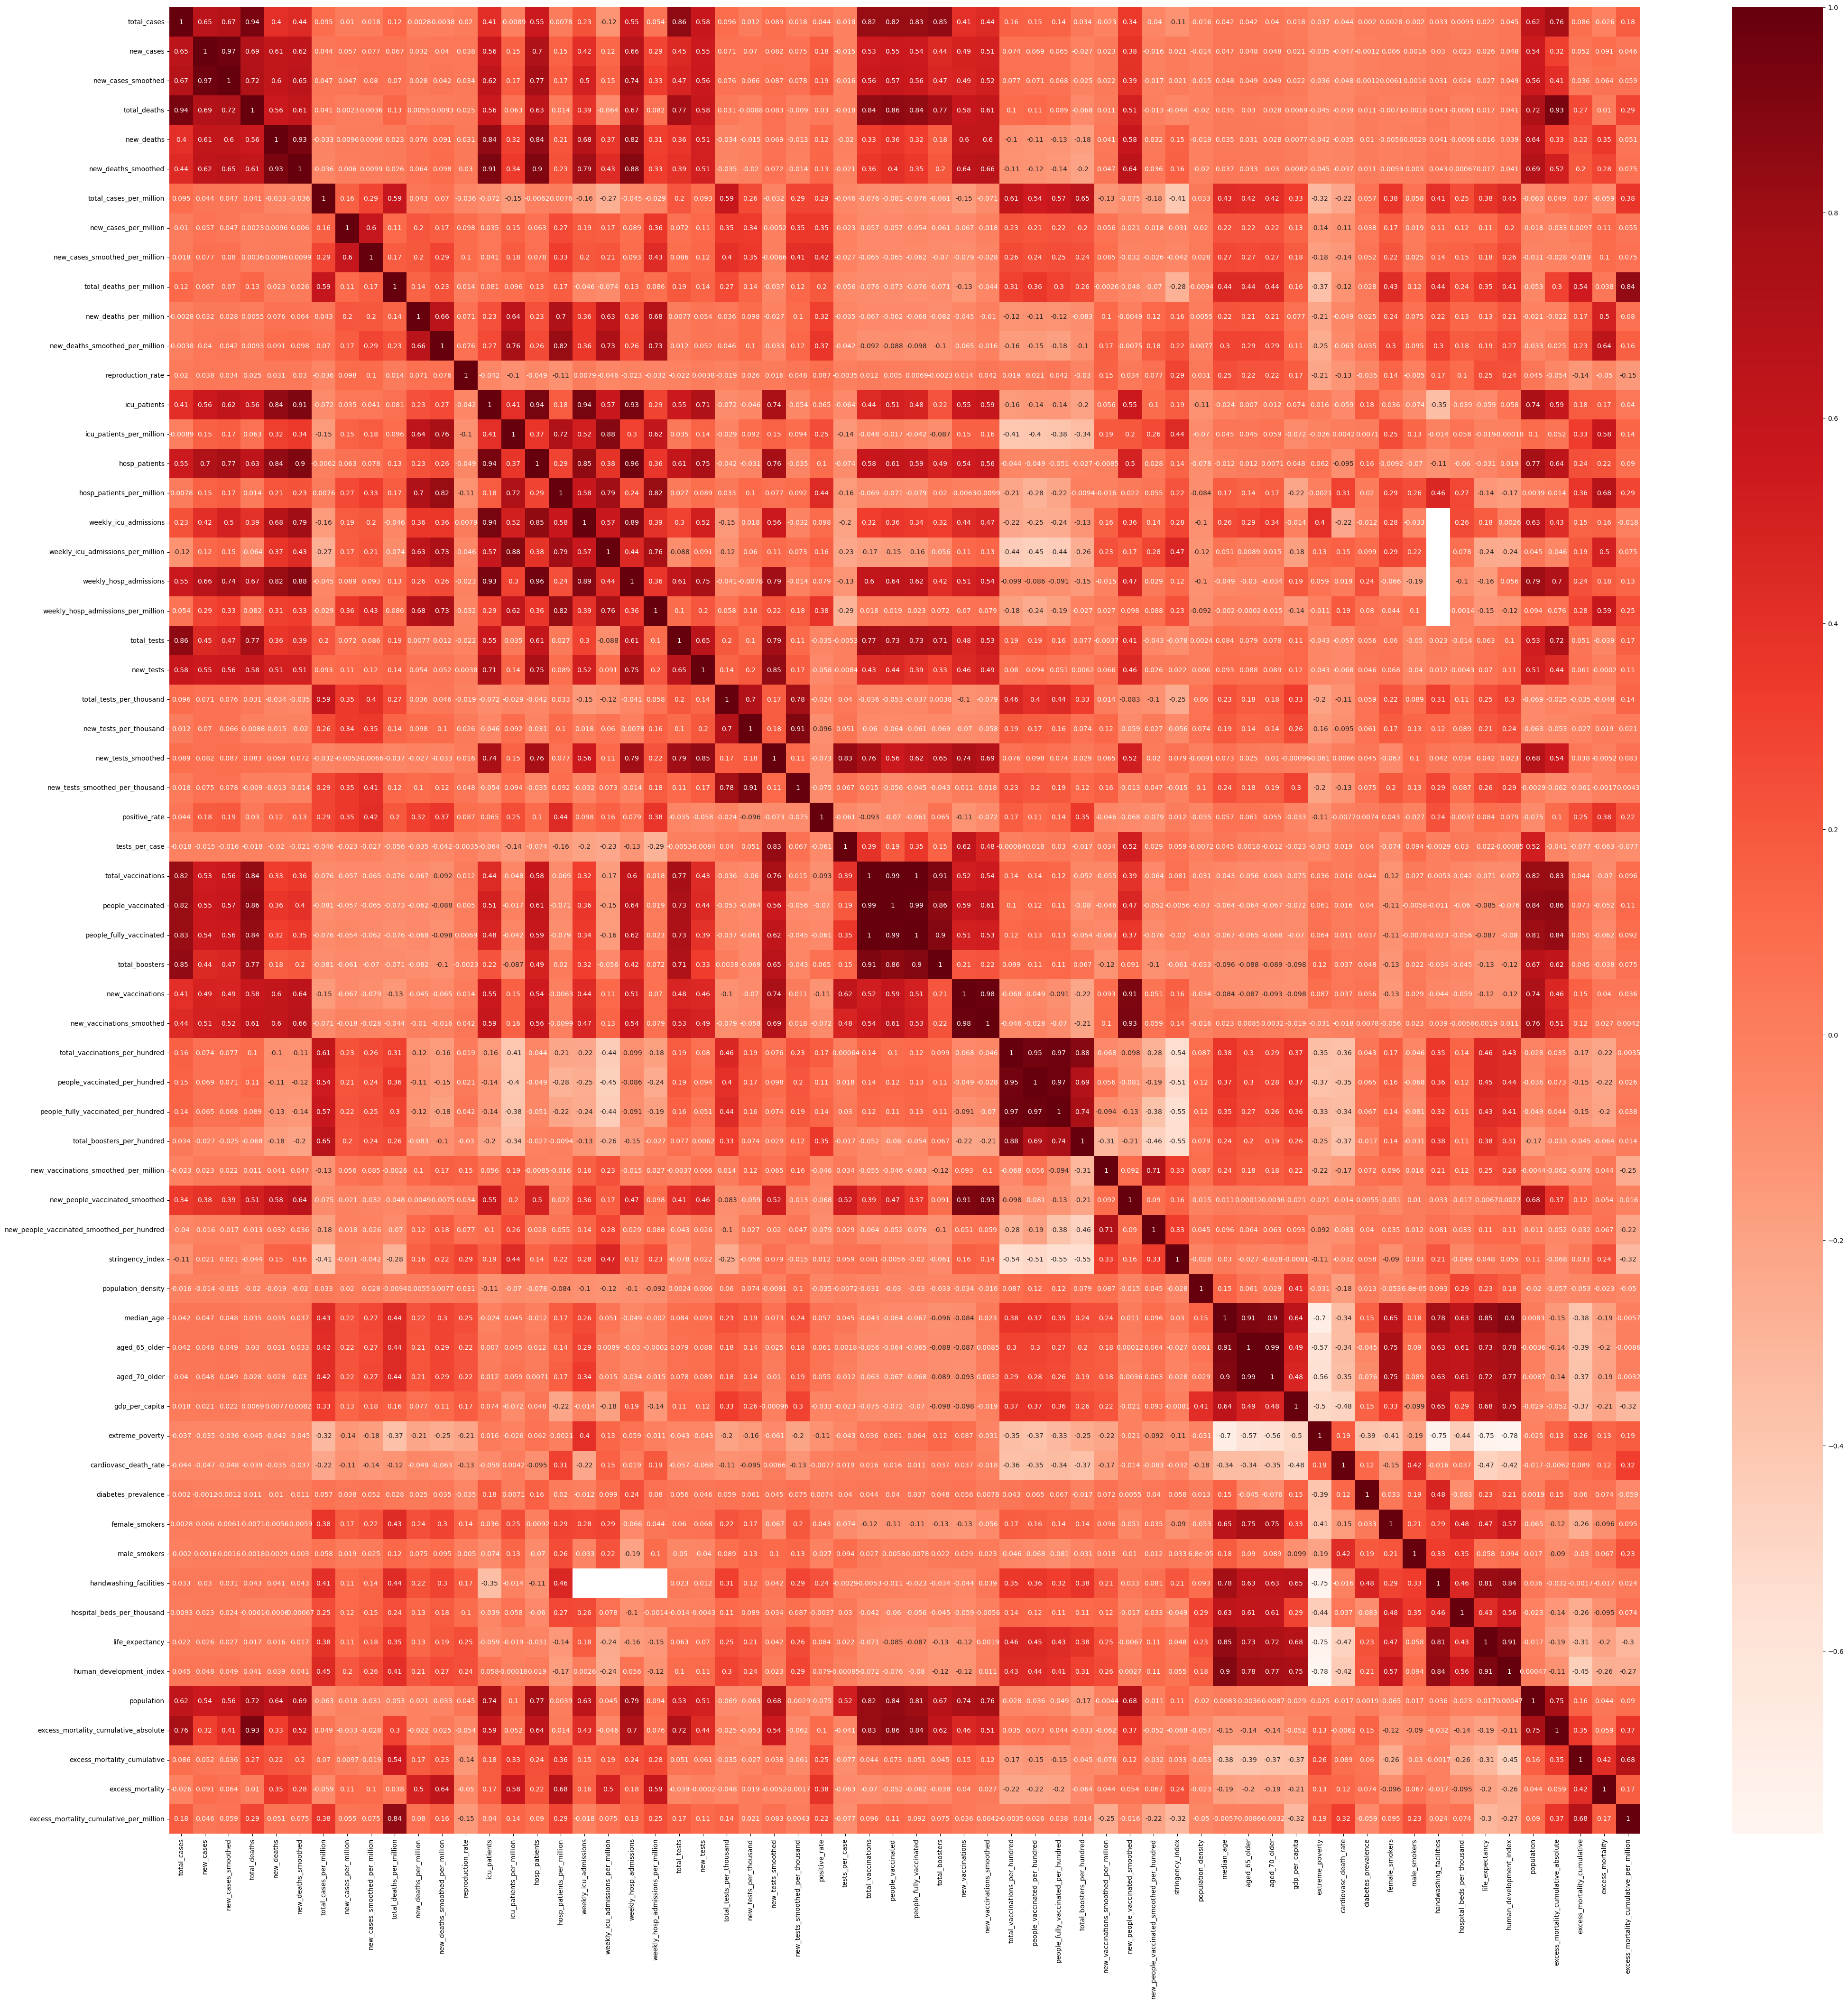

In [71]:
# heatmap untuk kolerasi feature yang memengaruhi total_deaths

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,50))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [111]:
#Total Death Predicition:
#Lihat dari Heatmap, variabel mana yang paling memengaruhi tingkat kematian, bisa dilihat dari situ bahwa total_cases yang memengaruhi paling banyak

newdf['year'] = pd.DatetimeIndex(newdf['date']).year  
newdf['month'] = pd.DatetimeIndex(newdf['date']).month  

df20 = newdf[(newdf.year == 2020)]
df21 = newdf[(newdf.year == 2021)]
df22 = newdf[(newdf.year == 2022)]
df23 = newdf[(newdf.year == 2023)]

#cari average total case per bulan dari 2020 - 2023
avg20 = df20['total_cases'].mean()
avg21 = df21['total_cases'].mean()
avg22 = df22['total_cases'].mean()
avg23 = df23['total_cases'].mean()


#memprediksi total_cases di maret 2023
#perbandingan total_cases per tahun (dibandingkan tahun sebelumnya)
print('20->21:',avg21/avg20)
print('21->22:',avg22/avg21)
print('22->23*',avg23/avg22)

#cari kenaikan perbandingan dari tahun sebelumnya
inc2122 = (avg22/avg21)/(avg21/avg20)
print('perbandingan kenaikan dari 21->22: ', inc2122)
#memprediksi kenaikan dari 22->23
pred_avg23 = inc2122*(avg22/avg21)
print('22->23:', pred_avg23)

#anggapan kenaikan perbulan konstan
inc_permonth23 = (pred_avg23-avg23/avg22)/11
print('inch per month 23: ',inc_permonth23)
print('inc total: ', inc_permonth23*11+avg23/avg22)

#estimasi total_cases di maret 23
total_cases23 = (avg23/avg22+inc_permonth23*3)*avg22
print('estimasi total cases di maret 2023: ',total_cases23)

20->21: 9.636161779381956
21->22: 5.159875928527489
22->23* 1.3093866501241174
perbandingan kenaikan dari 21->22:  0.535470039488942
22->23: 2.762958967206656
inch per month 23:  0.1321429379165944
inc total:  2.7629589672066555
estimasi total cases di maret 2023:  51417060.51898122


In [152]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

#melakukan train
x = newdf[['total_cases']]
x = np.array(x).reshape(-1,1)

#membuat linear regression
model = LinearRegression()
model.fit(x,y)

#prediksi total_death maret 23
x_predict = np.array(total_cases23).reshape(-1,1)
y_predict = model.predict(x_predict)
y_predict = y_predict[0][0]
print('total death in march 23: ' ,y_predict)

#kemungkinan hidup (populasi/total_death)
start_idx = newdf.index[0]
population = newdf.loc[start_idx]['population']
death_chance = y_predict / population
print('death chance in france - general: ',death_chance)

#sebaran usia penduduk prancis usia 20 - 39  = 15,292,354 (Sumber: https://id.zhujiworld.com/fr/#details)
#asumsi tiap range usia memiliki proporsi yang sama
dist_age25 = 1529354/population/20

print('death chance in france - age 25: ',death_chance*dist_age25)

total death in march 23:  216987.28413453785
death chance in france - general:  0.0031997888920197877
death chance in france - age 25:  3.608165057707247e-06


In [156]:
#Membuat df masing" negara
newdf =result.fillna(value=0)

df_france =  newdf[(newdf.location == "France")]
df_us =  newdf[(newdf.location == "United States")]
df_china =  newdf[(newdf.location == "China")]
df_german =  newdf[(newdf.location == "Germany")]


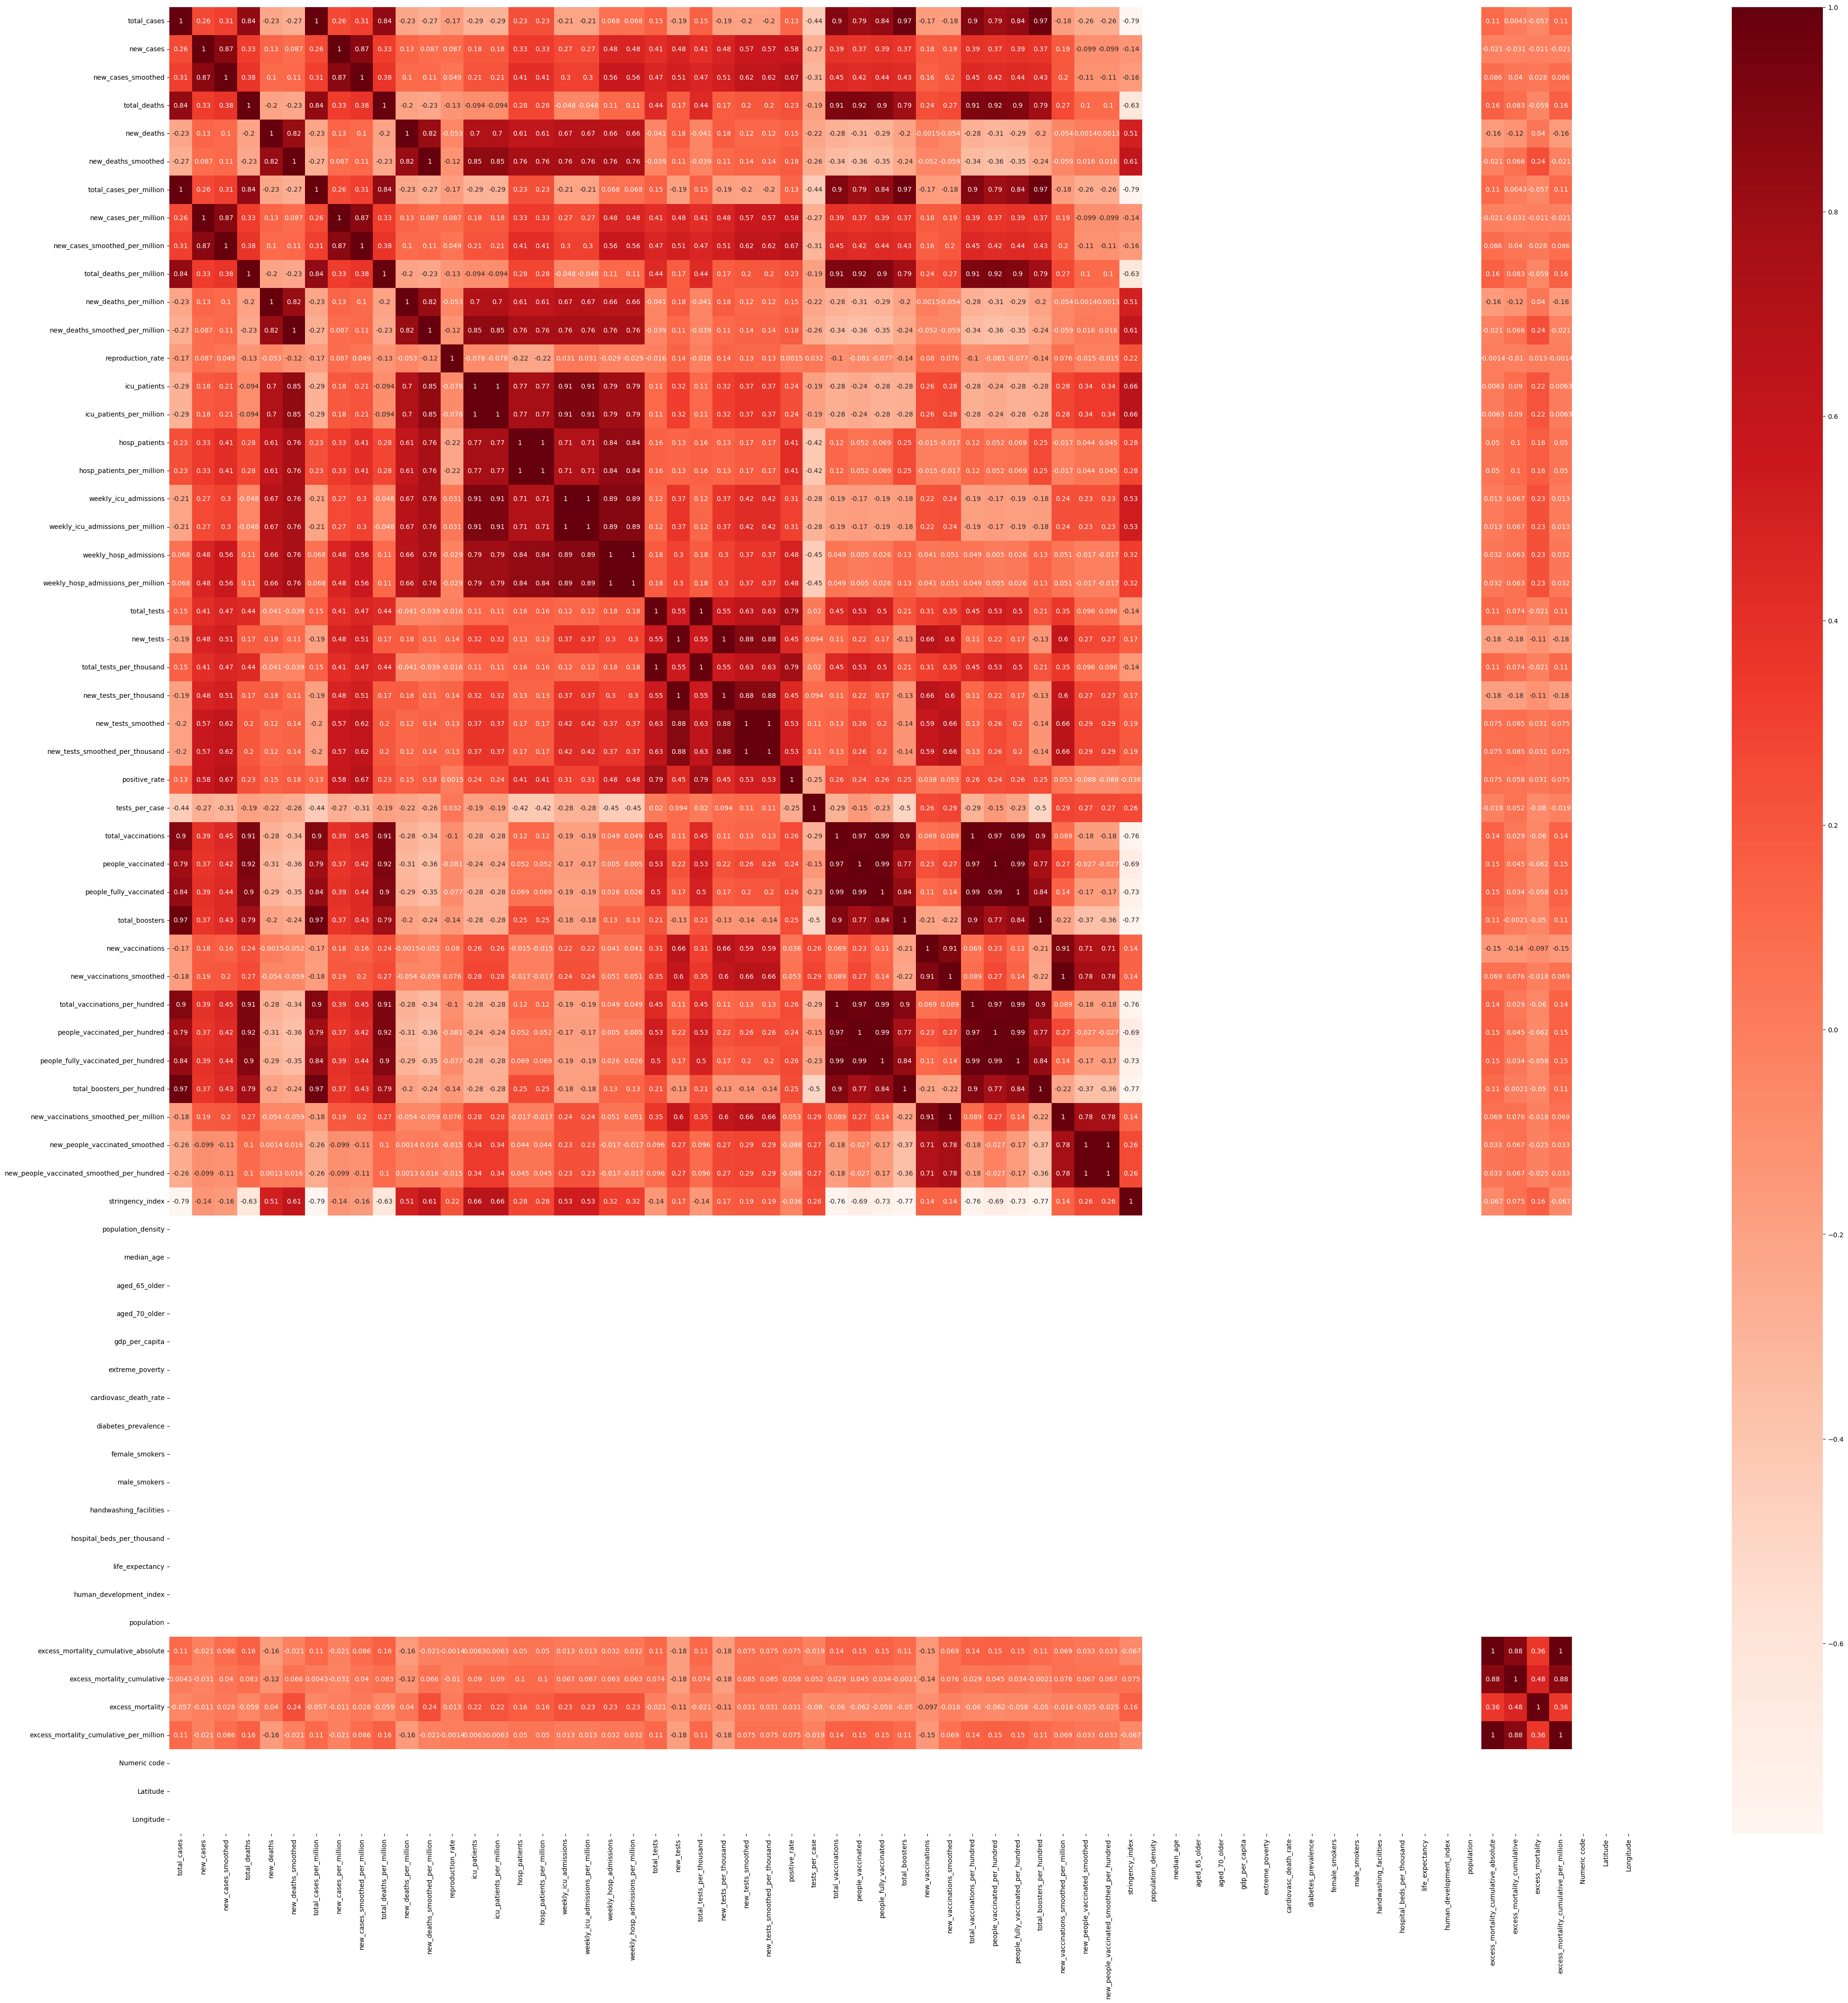

In [161]:
#Pada negara France, tingkat korelasi kematian (New_deaths) dipengaruhi oleh beberapa faktor yaitu: (by korelasi kuat)
# icu_patients / icu_patients_permillion
# hosps_patient / hosp_patients_permillion
# weekly_icu_admissions / weekly_icu_admissions_permillion
# weekly_hosp_admission / weekly_hosp_admission_permillion
plt.figure(figsize=(50,50))
cor = df_france.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

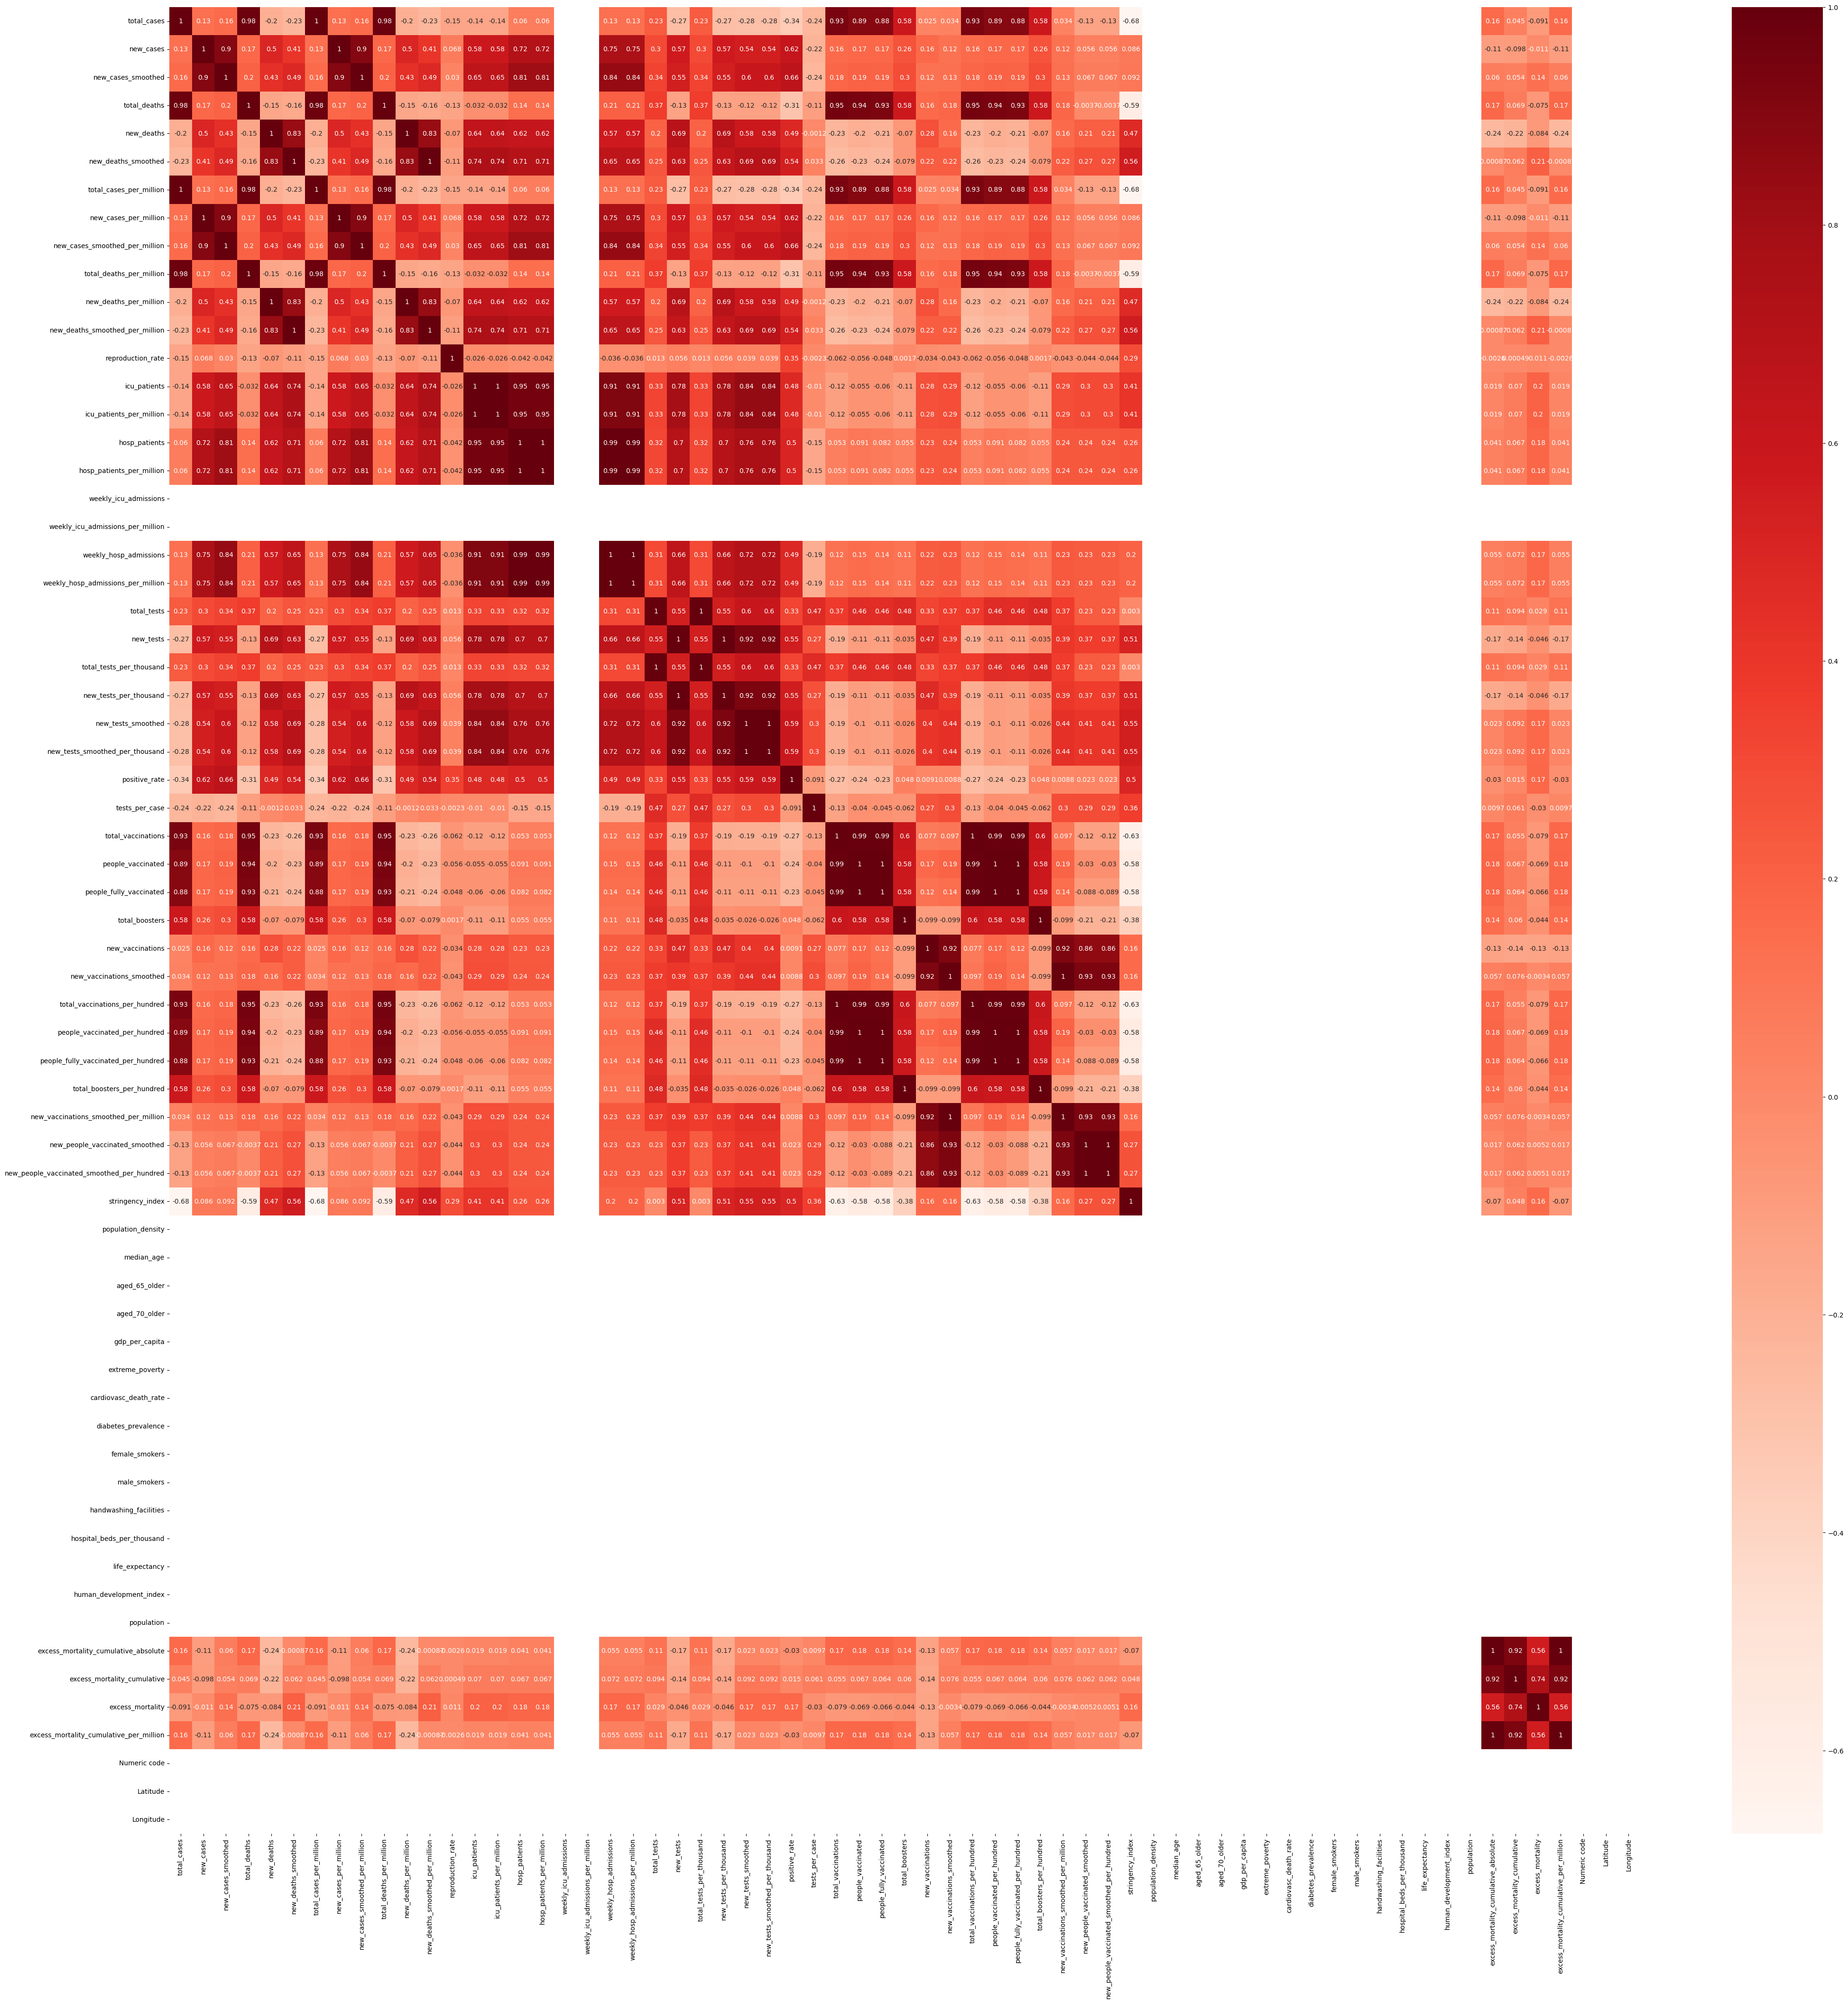

In [162]:
#Pada negara US, tingkat korelasi kematian (New_deaths) dipengaruhi oleh beberapa faktor yaitu: (by korelasi kuat)
# icu_patients / icu_patients_permillion
# hosps_patient / hosp_patients_permillion
# new_tests
plt.figure(figsize=(50,50))
cor = df_us.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

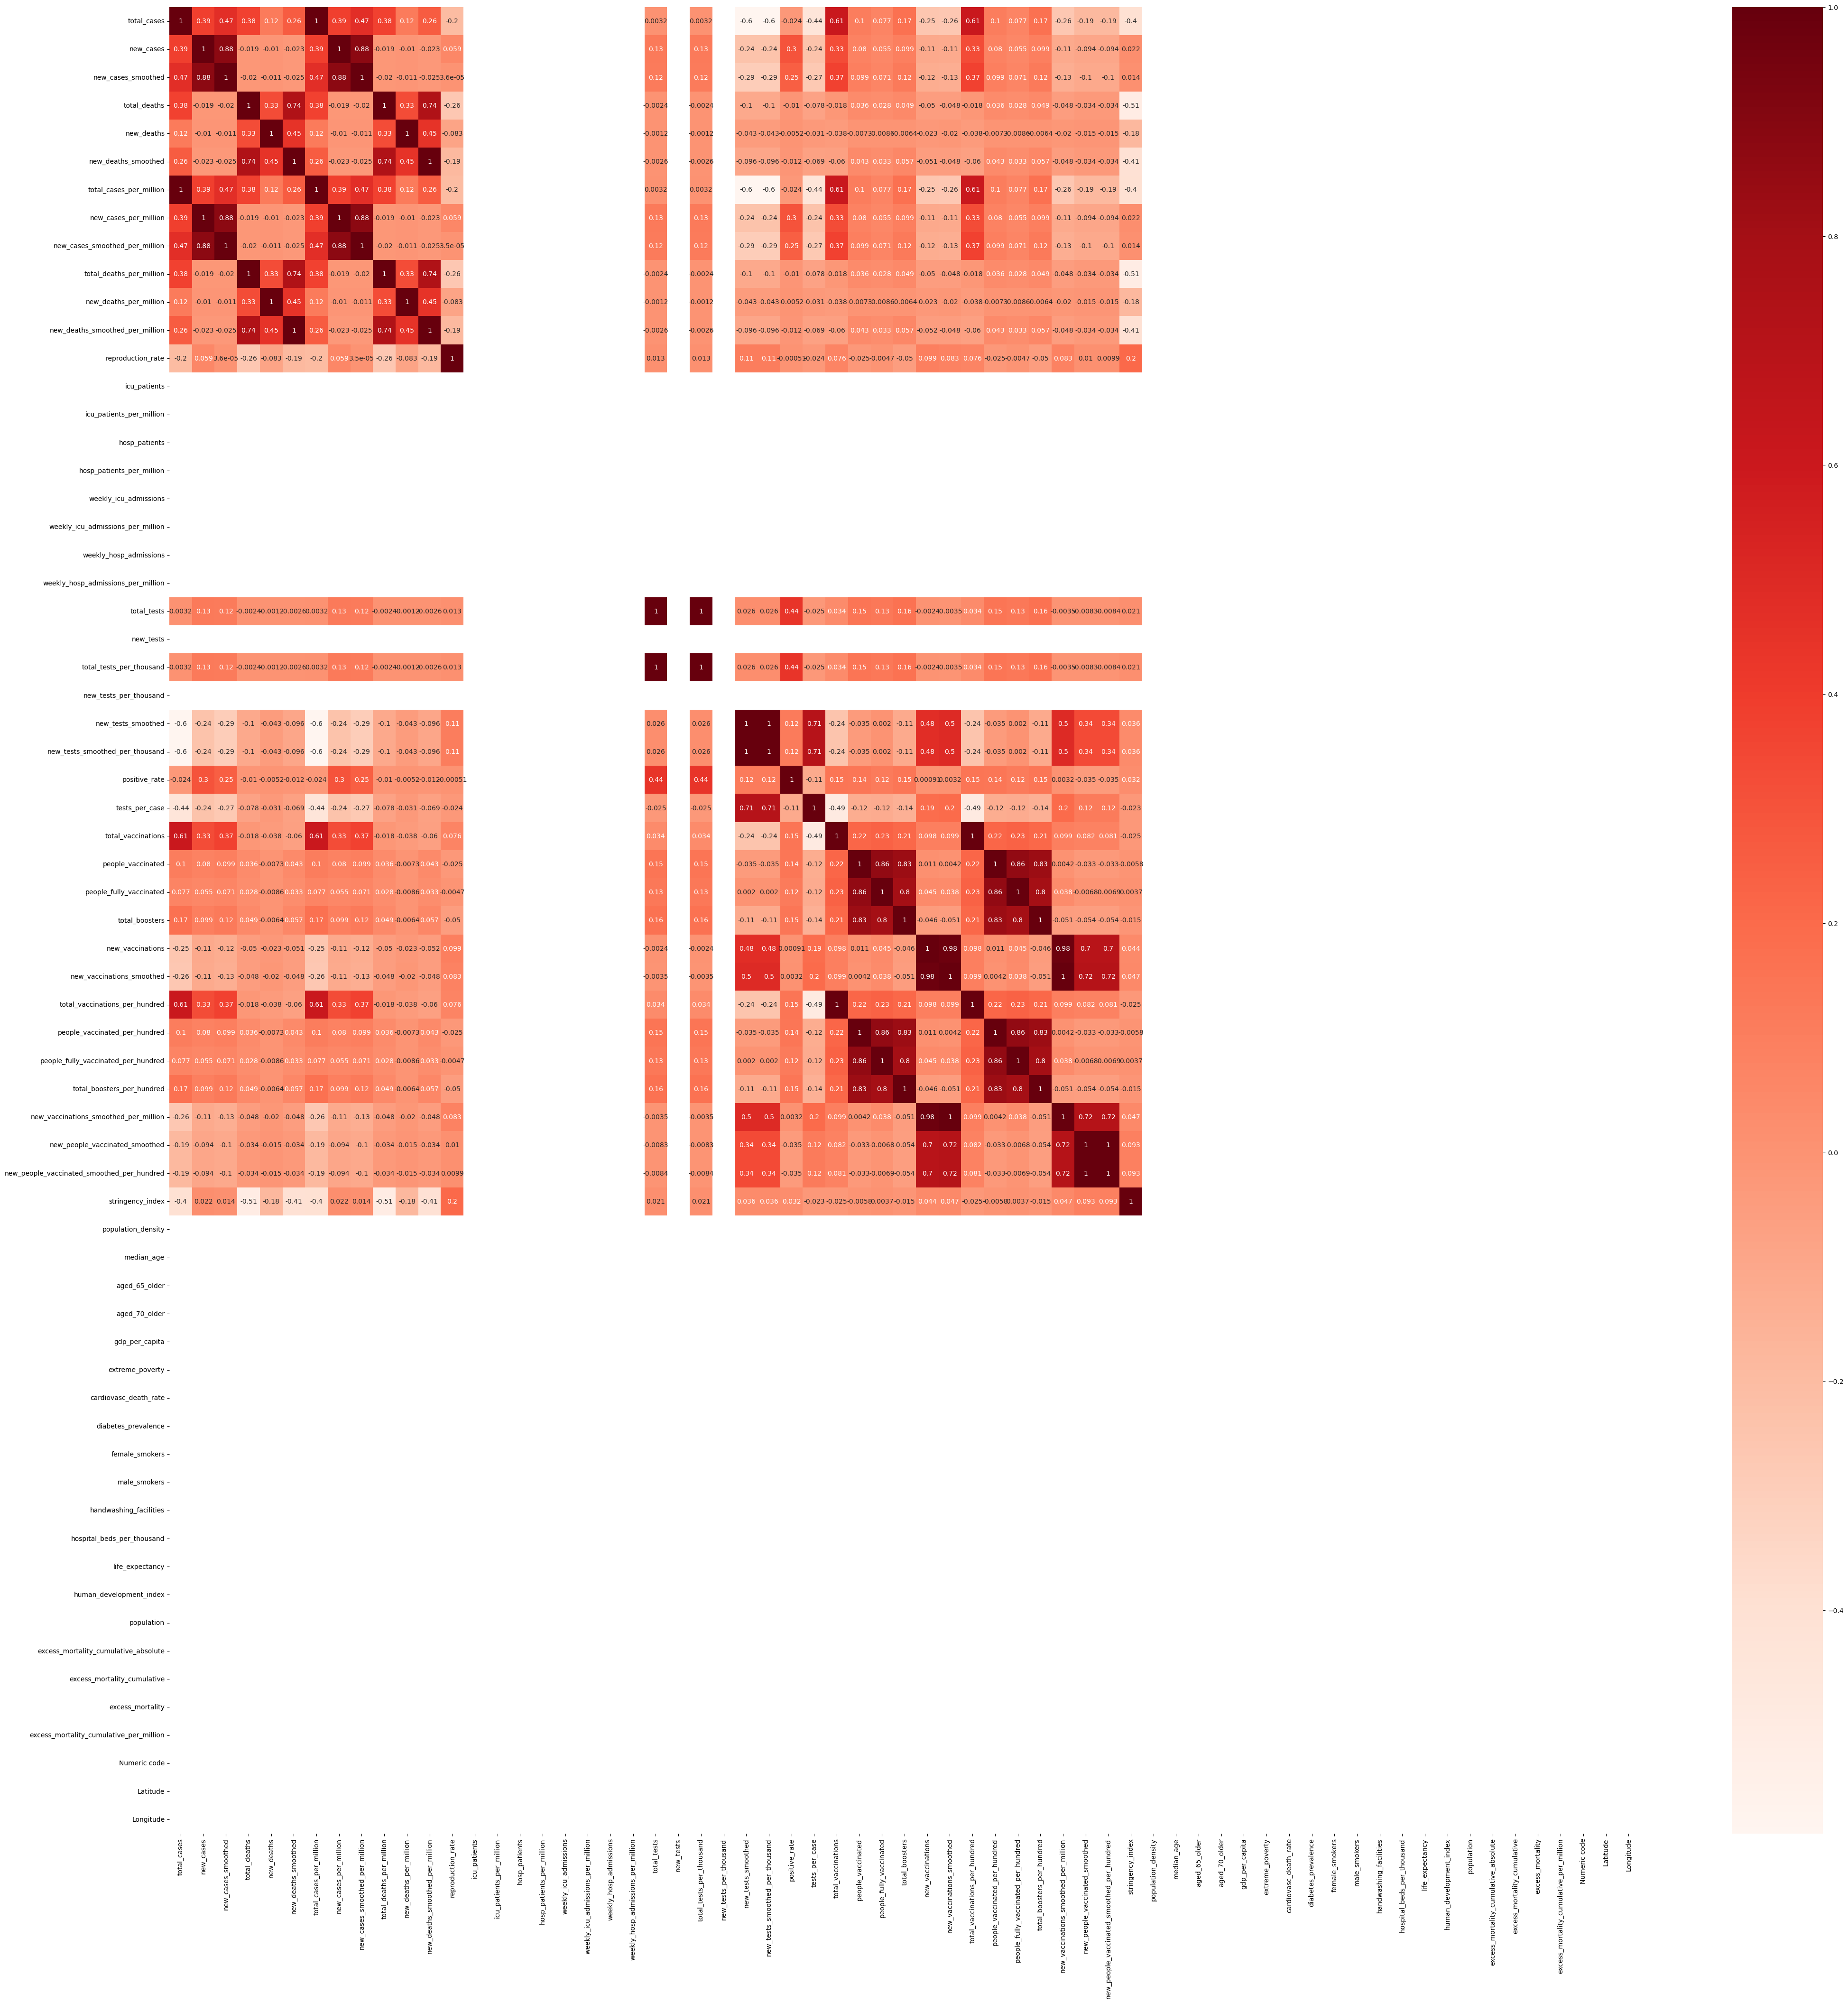

In [163]:
#Pada negara China, tingkat korelasi kematian (New_deaths) tidak ditemukan korelasi kuat
plt.figure(figsize=(50,50))
cor = df_china.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

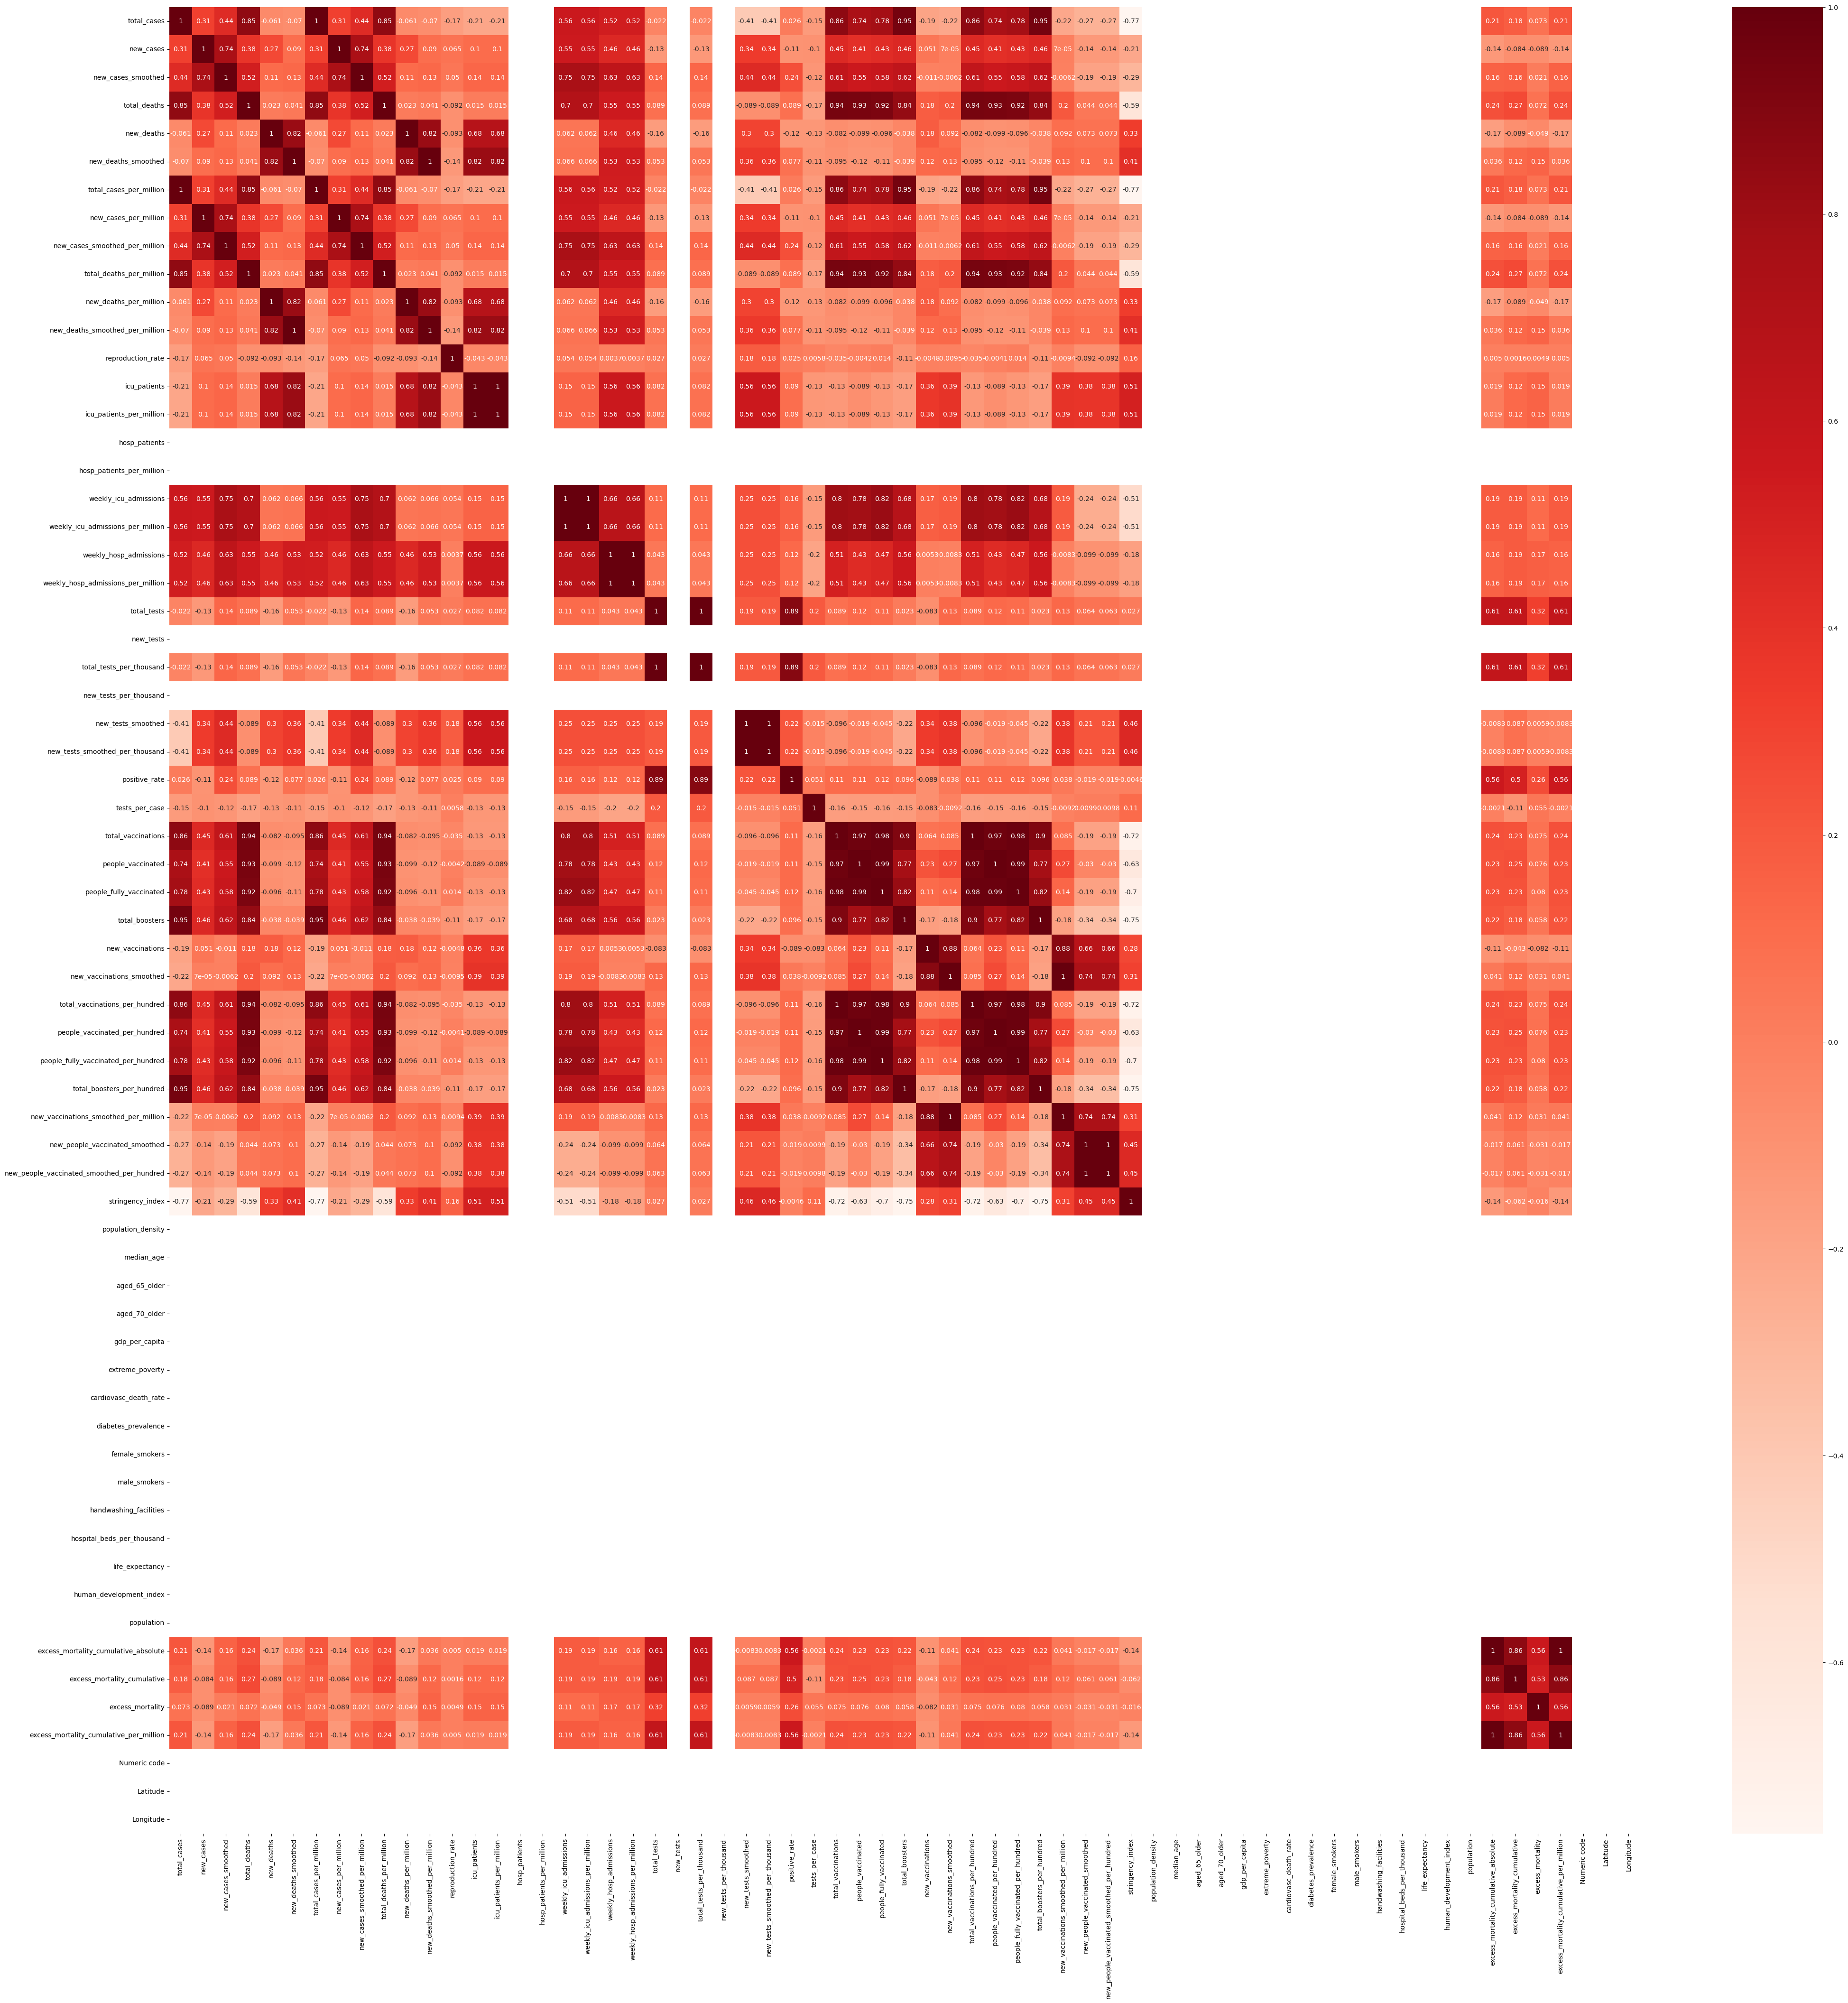

In [165]:
#Pada negara US, tingkat korelasi kematian (New_deaths) dipengaruhi oleh 1 faktor yaitu: (by korelasi kuat)
# icu_patients / icu_patients_permillion
plt.figure(figsize=(50,50))
cor = df_german.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()